In [ ]:
!pip install pennylane --upgrade
!pip install qutip.qip
!pip install qutip

In [ ]:
import numpy as np
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.linalg import expm, sinm, cosm
from qutip_qip.operations import *
import numpy as np
import seaborn as sns
from qutip import Qobj,  tensor, sigmax, sigmay, sigmaz , tensor, qeye,ptrace,ket2dm

<ipython-input-12-7958d5baddc9>:106: ComplexWarning: Casting complex values to real discards the imaginary part
  params[j] -= learning_rate * gradient


Epoch 2, Loss: (-0.22629701568859234+0j)
Epoch 3, Loss: (-0.3167486922478001+0j)
Epoch 4, Loss: (-0.3841274326768239+0j)
Epoch 5, Loss: (-0.42980763322774507+0j)
Epoch 6, Loss: (-0.45870198669830964+0j)
Epoch 7, Loss: (-0.4761471432967206+0j)
Epoch 8, Loss: (-0.4863761324954264+0j)
Epoch 9, Loss: (-0.4922693751216082+0j)
Epoch 10, Loss: (-0.49562992571570347+0j)
Epoch 11, Loss: (-0.4975349385995448+0j)
Epoch 12, Loss: (-0.4986112104905522+0j)
Epoch 13, Loss: (-0.49921811022355245+0j)
Epoch 14, Loss: (-0.49955996653294255+0j)
Epoch 15, Loss: (-0.4997524113547644+0j)
Epoch 16, Loss: (-0.49986070928440685+0j)


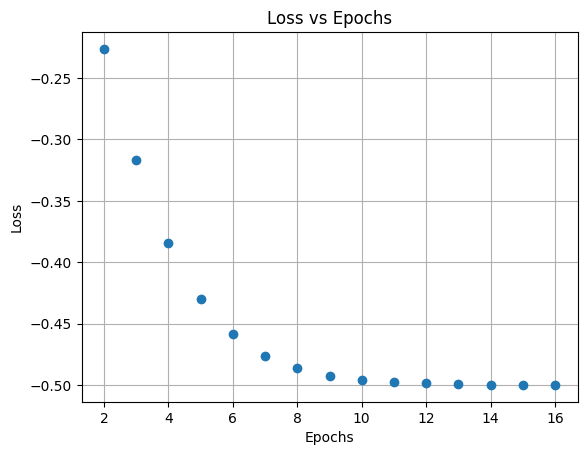

In [ ]:

#primeira função de custo

def loss(state,rho):

    psiab=state*state.dag()
    psib=ptrace(psiab,1)

    rhoab=rho
    rhob=ptrace(rho,1)

    return (psib*rhob).tr()-(rhoab*psiab).tr()

#segunda função de custo
def loss2(state,rho):
    #Mapa de redução nas matrizes de pauli
    X = tensor(qeye(2),sigmax())
    Y = tensor(qeye(2),sigmay())
    Z = tensor(qeye(2),sigmaz())
    rho_red=-rho*0.5 + (X * rho * X + Y * rho * Y + Z * rho * Z)*0.5

    return state.dag()*rho_red*state# pegando primeiro alto valor


# Criar um dispositivo (simulador) quântico
dev = qml.device("default.qubit", wires=2)

# Definir o circuito quântico para criar o estado de Bell
@qml.qnode(dev)
def bell_state():
    qml.Hadamard(wires=0)  # Aplica a porta Hadamard no qubit 0
    qml.CNOT(wires=[0, 1])  # Aplica a porta CNOT com o qubit 0 como controle e o qubit 1 como alvo
    return qml.state()

def loss_function(params):
    """
    Função de perda a ser minimizada.
    Substitua por sua própria função de perda.
    """
    #rho_ab
    initial_state = bell_state() # Estado que vai emaranhar
    rho = np.outer(initial_state, np.conj(initial_state))
    #psi_ab
    parametros = params # Valores de exemplo para os parâmetros
    state = circuito(parametros)#função teste
    #função
    rho_qu = Qobj(rho,dims=[[2,2],[2,2]])  # Estado inicial
    state_qu = Qobj(state,dims=[[2,2],[1]])

    return loss(state_qu,rho_qu)


# Definir o circuito quântico
@qml.qnode(dev)
def circuito(parametros):
    """
    Circuito quântico com rotações Ry e Rz e um CNOT.

    Args:
        parametros (list): Lista de parâmetros [alpha1, alpha2, alpha3].

    Returns:
        array: Estado quântico final do sistema.
    """

    # Parâmetros
    alpha1, alpha2, alpha3 = parametros

    # Rotações Ry
    qml.RY(alpha1, wires=0)
    qml.RY(alpha2, wires=1)

    # Rotação Rz
    qml.RZ(alpha3, wires=0)

    # Porta CNOT (Controlled-NOT)
    qml.CNOT(wires=[0, 1])

    return qml.state()

def parameter_shift_gradient(params, j):
    """
    Calcula o gradiente da função de perda em relação ao parâmetro j
    usando a regra parameter-shift.
    """
    shifted_params_plus = params.copy()
    shifted_params_plus[j] += np.pi / 2

    shifted_params_minus = params.copy()
    shifted_params_minus[j] -= np.pi / 2

    gradient = 0.5 * (loss_function(shifted_params_plus) - loss_function(shifted_params_minus))
    return gradient

def stochastic_gradient_descent(params, learning_rate, num_epochs,epsilon):
    """
    Executa o algoritmo SGD usando a regra parameter-shift para calcular gradientes.
    """
    epoch=0
    loss=0
    loss_vec=[]
    epochs_vec=[]
    while ( epoch<num_epochs):#np.real(loss)>(-epsilon) and
      epoch+=1
      for j in range(len(params)):
          gradient = parameter_shift_gradient(params, j)
          params[j] -= learning_rate * gradient

      # Avalie a função de perda após cada época, se desejar
      loss = loss_function(params)
      loss_vec.append(np.real(loss))
      epochs_vec.append(epoch+1)
      print(f"Epoch {epoch+1}, Loss: {loss}")

    return params,loss_vec,epochs_vec

# Exemplo de uso
params = np.random.rand(3)  # Inicialize os parâmetros aleatoriamente
learning_rate = 0.5
num_epochs = 15

optimized_params,vec1,vec2 = stochastic_gradient_descent(params, learning_rate,num_epochs,0.1)
plt.plot(vec2,vec1,'o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title('Loss vs Epochs')
plt.show()

Epoch 2, Loss: (-0.20339697360604936+0j)
Epoch 3, Loss: (-0.28343620541828995+0j)
Epoch 4, Loss: (-0.35240990786573173-1.3877787807814457e-17j)
Epoch 5, Loss: (-0.40535043798666687+0j)
Epoch 6, Loss: (-0.4420902826483908+0j)
Epoch 7, Loss: (-0.46570803796156973+0j)
Epoch 8, Loss: (-0.48011527951310806+6.938893903907228e-18j)
Epoch 9, Loss: (-0.4886160210819656+0j)
Epoch 10, Loss: (-0.4935316185543962+0j)
Epoch 11, Loss: (-0.4963406353183212+0j)
Epoch 12, Loss: (-0.4979349275366875+1.734723475976807e-18j)
Epoch 13, Loss: (-0.49883627113832024-1.734723475976807e-18j)
Epoch 14, Loss: (-0.49934472779956496+0j)
Epoch 15, Loss: (-0.4996311955165588-8.673617379884035e-19j)
Epoch 16, Loss: (-0.4997924797391061+0j)


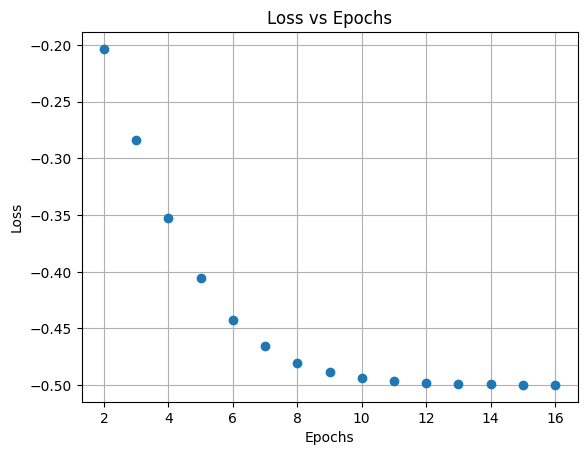

In [ ]:

#primeira função de custo

def loss(state,rho):

    psiab=state*state.dag()
    psib=ptrace(psiab,1)

    rhoab=rho
    rhob=ptrace(rho,1)

    return (psib*rhob).tr()-(rhoab*psiab).tr()

#segunda função de custo
def loss2(state,rho):
    #Mapa de redução nas matrizes de pauli
    X = tensor(qeye(2),sigmax())
    Y = tensor(qeye(2),sigmay())
    Z = tensor(qeye(2),sigmaz())
    rho_red=-rho*0.5 + (X * rho * X + Y * rho * Y + Z * rho * Z)*0.5

    return state.dag()*rho_red*state# pegando primeiro alto valor


# Criar um dispositivo (simulador) quântico
dev = qml.device("default.qubit", wires=2)

# Definir o circuito quântico para criar o estado de Bell
@qml.qnode(dev)
def bell_state():
    qml.Hadamard(wires=0)  # Aplica a porta Hadamard no qubit 0
    qml.CNOT(wires=[0, 1])  # Aplica a porta CNOT com o qubit 0 como controle e o qubit 1 como alvo
    return qml.state()

def loss_function(params):
    """
    Função de perda a ser minimizada.
    Substitua por sua própria função de perda.
    """
    #rho_ab
    initial_state = bell_state() # Estado que vai emaranhar
    rho = np.outer(initial_state, np.conj(initial_state))
    #psi_ab
    parametros = params # Valores de exemplo para os parâmetros
    state = circuito(parametros)#função teste
    #função
    rho_qu = Qobj(rho,dims=[[2,2],[2,2]])  # Estado inicial
    state_qu = Qobj(state,dims=[[2,2],[1]])

    return loss2(state_qu,rho_qu)


# Definir o circuito quântico
@qml.qnode(dev)
def circuito(parametros):
    """
    Circuito quântico com rotações Ry e Rz e um CNOT.

    Args:
        parametros (list): Lista de parâmetros [alpha1, alpha2, alpha3].

    Returns:
        array: Estado quântico final do sistema.
    """

    # Parâmetros
    alpha1, alpha2, alpha3 = parametros

    # Rotações Ry
    qml.RY(alpha1, wires=0)
    qml.RY(alpha2, wires=1)

    # Rotação Rz
    qml.RZ(alpha3, wires=0)

    # Porta CNOT (Controlled-NOT)
    qml.CNOT(wires=[0, 1])

    return qml.state()

def parameter_shift_gradient(params, j):
    """
    Calcula o gradiente da função de perda em relação ao parâmetro j
    usando a regra parameter-shift.
    """
    shifted_params_plus = params.copy()
    shifted_params_plus[j] += np.pi / 2

    shifted_params_minus = params.copy()
    shifted_params_minus[j] -= np.pi / 2

    gradient = 0.5 * (loss_function(shifted_params_plus) - loss_function(shifted_params_minus))
    return gradient

def stochastic_gradient_descent(params, learning_rate, num_epochs,epsilon):
    """
    Executa o algoritmo SGD usando a regra parameter-shift para calcular gradientes.
    """
    epoch=0
    loss=0
    loss_vec=[]
    epochs_vec=[]
    while ( epoch<num_epochs):#np.real(loss)>(-epsilon) and
      epoch+=1
      for j in range(len(params)):
          gradient = parameter_shift_gradient(params, j)
          params[j] -= learning_rate *np.real(gradient)

      # Avalie a função de perda após cada época, se desejar
      loss = loss_function(params)
      loss_vec.append(np.real(loss))
      epochs_vec.append(epoch+1)
      print(f"Epoch {epoch+1}, Loss: {loss}")

    return params,loss_vec,epochs_vec

# Exemplo de uso
params = np.random.rand(3)  # Inicialize os parâmetros aleatoriamente
learning_rate = 0.5
num_epochs = 15

optimized_params,vec1,vec2 = stochastic_gradient_descent(params, learning_rate,num_epochs,0.1)
plt.plot(vec2,vec1,'o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title('Loss vs Epochs')
plt.show()

Estado de Bell: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Parametros utilizados: [1.55015641 0.01350432 0.01489319]
Operador densidade final:
Auto-energias:
[-6.55934362e-17  3.91867422e-19  4.31955590e-17  1.00000000e+00]


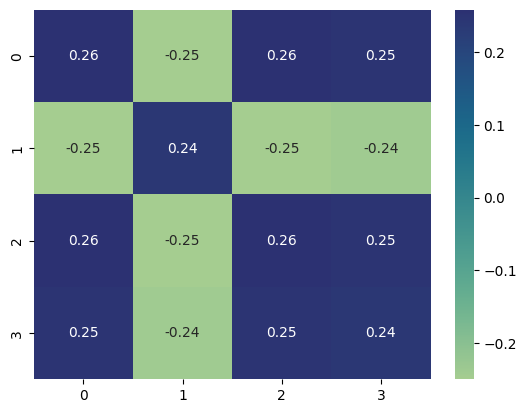

In [ ]:
import pennylane as qml
from pennylane import numpy as np

# Número de qubits
num_qubits = 2

# Criar um dispositivo (simulador) quântico
dev = qml.device("default.qubit", wires=num_qubits)

# Definir o circuito quântico
@qml.qnode(dev)
def circuito2(parametros,initial_state):
    """
    Circuito quântico com rotações Ry e Rz e um CNOT.

    Args:
        parametros (list): Lista de parâmetros [alpha1, alpha2, alpha3].

    Returns:
        array: Estado quântico final do sistema.
    """
    # Estado inicial
    qml.StatePrep(initial_state, wires=range(int(num_qubits)))
    # Parâmetros
    alpha1, alpha2, alpha3 = parametros

    # Rotações Ry
    qml.RY(alpha1, wires=0)
    qml.RY(alpha2, wires=1)

    # Rotação Rz
    qml.RZ(alpha3, wires=0)

    # Porta CNOT (Controlled-NOT)
    qml.CNOT(wires=[0, 1])

    return qml.state()


# Criar um dispositivo (simulador) quântico
dev = qml.device("default.qubit", wires=2)

# Definir o circuito quântico para criar o estado de Bell
@qml.qnode(dev)
def bell_state():
    qml.Hadamard(wires=0)  # Aplica a porta Hadamard no qubit 0
    qml.CNOT(wires=[0, 1])  # Aplica a porta CNOT com o qubit 0 como controle e o qubit 1 como alvo
    return qml.state()

# Executar o circuito e obter o estado final
state = bell_state()
print("Estado de Bell:", state)

# Exemplo de uso
resultado = circuito2(optimized_params,bell_state())# Vendo o estado final
state_qu = Qobj(resultado,dims=[[2,2],[1]])
rho=state_qu*state_qu.dag()

print("Parametros utilizados:", optimized_params)
print("Operador densidade final:")
#plot do operador densidade
sns.heatmap(np.real(rho.full()),annot=True,cmap="crest")
print("Auto-energias:")
print(rho.eigenenergies())